<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/BreastCancer/blob/main/Breast_Cancer_V2_TVAE_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

In [11]:
#original data
df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/tvae_SDV_BreastCancer.csv")
del df['Unnamed: 0']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,9.866787,14.637137,63.409325,283.713730,0.084223,0.046159,0.016544,0.020951,0.170999,...,13.174990,18.064878,79.308249,368.916148,0.152767,0.166851,0.158809,0.035439,0.288579,0.073689
1,B,12.885053,21.506004,79.229176,336.364127,0.081238,0.061742,0.030052,0.025329,0.169469,...,15.764673,27.487070,81.358017,726.979378,0.112737,0.137944,0.120542,0.071356,0.271750,0.068861
2,B,11.165762,15.516346,84.076405,356.413321,0.112075,0.064143,0.012986,0.000000,0.159183,...,12.177383,34.227039,87.682893,644.261133,0.125459,0.256056,0.112901,0.045699,0.301039,0.055040
3,B,12.271667,19.807824,68.534578,428.143496,0.088438,0.031222,0.028840,0.018988,0.144926,...,14.332578,18.433072,68.255508,505.092414,0.092259,0.116755,0.059426,0.044334,0.235016,0.079151
4,B,7.454015,12.357933,51.167853,202.087605,0.088588,0.052791,0.051511,0.013281,0.174599,...,10.671485,18.960872,60.949763,340.397278,0.127406,0.107711,0.110993,0.000000,0.299682,0.069818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,B,11.653797,19.591590,66.871153,347.640448,0.114469,0.153040,0.098849,0.020412,0.171224,...,13.364227,31.212963,75.105110,309.445867,0.150710,0.268134,0.244718,0.056089,0.251965,0.088369
9996,B,12.779385,13.799951,71.689730,568.975097,0.102959,0.126075,0.107483,0.026956,0.176738,...,14.636441,25.387452,81.755763,675.860482,0.160312,0.562150,0.291571,0.173512,0.298970,0.102903
9997,B,12.144682,17.091324,72.648862,363.638743,0.115953,0.122028,0.112376,0.031809,0.145315,...,12.978866,21.222782,88.692189,534.210501,0.185600,0.492610,0.452870,0.090011,0.243860,0.143752
9998,B,11.440653,14.876270,83.906545,447.719512,0.101748,0.135110,0.069284,0.093306,0.198483,...,14.864455,19.688309,104.210820,711.314226,0.158937,0.555026,0.211123,0.186335,0.263381,0.072269


In [12]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()

In [13]:
df['diagnosis'].value_counts()

B    6166
M    3834
Name: diagnosis, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
print("Original data : ",df.shape)
print("tarin         : ",X_train.shape)
print("test          : ",X_test.shape[0])
#print("validation    : ",X_val.shape[0])

Original data :  (10000, 31)
tarin         :  (8000, 30)
test          :  2000


In [15]:
# SVM
svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
svm.fit(X_train, y_train)
STr = svm.score(X_train, y_train)
STe = svm.score(X_test, y_test)
y_pred_svm = svm.predict(X_test)

In [16]:
#ANN
tf.random.set_seed(123)
ANNmodel = Sequential()
ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
ANNmodel.add(Dense(10, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))
ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
ATr = ANNmodel.evaluate(X_train,y_train,verbose=0)[1]
ATe = ANNmodel.evaluate(X_test,y_test,verbose=0)[1]
y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")

Epoch 1/20
57/57 [==============================] - 2s 14ms/step - loss: 0.4079 - accuracy: 0.7556 - val_loss: 0.2681 - val_accuracy: 0.9112
Epoch 2/20
57/57 [==============================] - 0s 4ms/step - loss: 0.1989 - accuracy: 0.9253 - val_loss: 0.1612 - val_accuracy: 0.9362
Epoch 3/20
57/57 [==============================] - 0s 5ms/step - loss: 0.1477 - accuracy: 0.9396 - val_loss: 0.1327 - val_accuracy: 0.9450
Epoch 4/20
57/57 [==============================] - 0s 5ms/step - loss: 0.1315 - accuracy: 0.9447 - val_loss: 0.1231 - val_accuracy: 0.9463
Epoch 5/20
57/57 [==============================] - 0s 5ms/step - loss: 0.1244 - accuracy: 0.9478 - val_loss: 0.1196 - val_accuracy: 0.9438
Epoch 6/20
57/57 [==============================] - 0s 4ms/step - loss: 0.1209 - accuracy: 0.9496 - val_loss: 0.1163 - val_accuracy: 0.9463
Epoch 7/20
57/57 [==============================] - 0s 5ms/step - loss: 0.1179 - accuracy: 0.9504 - val_loss: 0.1151 - val_accuracy: 0.9475
Epoch 8/20
57/57 [=

In [17]:
#XGBoost
params = {
            'objective':'binary:logistic',
            'max_depth': 7,
            'alpha': 10,
            'learning_rate': 1,
            'n_estimators':100
        }
xgb = XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
XTr = accuracy_score(y_train, xgb.predict(X_train))
XTe = accuracy_score(y_test, xgb.predict(X_test))
XTr,XTe

(0.98825, 0.9455)

In [18]:
#KNN
# Define the range of n_neighbors values to test
n_neighbors_values = [1,3, 5, 7, 9, 11]

best_accuracy = 0.0
best_n_neighbors = None

for n_neighbors in n_neighbors_values:
    print("Number of Neighbors:", n_neighbors)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))

    print('KNN model train accuracy score: {0:0.4f}'.format(train_accuracy))
    print('KNN model test accuracy score: {0:0.4f}'.format(test_accuracy))
    print()

    # Check if the current test accuracy is better than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_neighbors = n_neighbors
print("best neighbours: ", best_n_neighbors)
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
KTr = accuracy_score(y_train, knn.predict(X_train))
KTe = accuracy_score(y_test, knn.predict(X_test))
y_pred_knn = knn.predict(X_test)
KTr,KTe


Number of Neighbors: 1
KNN model train accuracy score: 1.0000
KNN model test accuracy score: 0.9180

Number of Neighbors: 3
KNN model train accuracy score: 0.9629
KNN model test accuracy score: 0.9340

Number of Neighbors: 5
KNN model train accuracy score: 0.9549
KNN model test accuracy score: 0.9445

Number of Neighbors: 7
KNN model train accuracy score: 0.9537
KNN model test accuracy score: 0.9440

Number of Neighbors: 9
KNN model train accuracy score: 0.9523
KNN model test accuracy score: 0.9445

Number of Neighbors: 11
KNN model train accuracy score: 0.9499
KNN model test accuracy score: 0.9410

best neighbours:  5


(0.954875, 0.9445)

In [19]:
#RF
rf = RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123)
rf.fit(X_train, y_train)
RTr = accuracy_score(y_train, rf.predict(X_train))
RTe = accuracy_score(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
RTr,RTe

(0.943875, 0.9505)

In [20]:
#LR
lr = LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123)
lr.fit(X_train, y_train)
LTr = accuracy_score(y_train, lr.predict(X_train))
LTe = accuracy_score(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
LTr,LTe

(0.95, 0.95)

In [21]:
def CVal(ML):

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/tvae_SDV_BreastCancer.csv")
  del df['Unnamed: 0']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    ML.fit(X_train, y_train)
    y_pred_ML = ML.predict(X_test)


    y_pred.append(y_pred_ML)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]+1

  y_pred_final = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_final.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass
  return y_pred_final

In [22]:
def CValANN():

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/tvae_SDV_BreastCancer.csv")
  del df['Unnamed: 0']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    tf.random.set_seed(123)
    ANNmodel = Sequential()
    ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
    ANNmodel.add(Dense(10, activation='relu'))
    ANNmodel.add(Dense(1, activation='sigmoid'))
    ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
    y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")


    y_pred.append(y_pred_ANN)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]

  y_pred_fina = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_fina.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass

  y_pred_final = []

  for i in range(len(y_pred_fina)):
    y_pred_final.append(y_pred_fina[i][0])

  return y_pred_final

In [23]:
newdata = pd.DataFrame({
    "SVM": CVal(SVC(C=0.1, gamma='auto', kernel = 'rbf'))
})
newdata["KNN"] = CVal(KNeighborsClassifier(n_neighbors=3))
newdata["RF"]  = CVal(RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123))
newdata['LR']  = CVal(LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123))
newdata["ANN"] = CValANN()
newdata["XGB"] = CVal(XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100))
newdata['y_test'] = encoder.fit_transform(df['diagnosis']).copy()

Epoch 1/20
57/57 [==============================] - 1s 6ms/step - loss: 0.3894 - accuracy: 0.8478 - val_loss: 0.2342 - val_accuracy: 0.9212
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.9347 - val_loss: 0.1528 - val_accuracy: 0.9413
Epoch 3/20
57/57 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9431 - val_loss: 0.1337 - val_accuracy: 0.9500
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1267 - accuracy: 0.9463 - val_loss: 0.1273 - val_accuracy: 0.9550
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.9496 - val_loss: 0.1240 - val_accuracy: 0.9525
Epoch 6/20
57/57 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9508 - val_loss: 0.1213 - val_accuracy: 0.9538
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1157 - accuracy: 0.9510 - val_loss: 0.1204 - val_accuracy: 0.9538
Epoch 8/20
57/57 [==

In [24]:
newdata.head()

,SVM,KNN,RF,LR,ANN,XGB,y_test
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [25]:
# Define the DNN model
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata.y_test.copy()
DX_train, DX_test, Dy_train, Dy_test = train_test_split(
    DNNX, DNNY, test_size=0.2, random_state=123)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=DNNX.shape[1:]),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(DX_train, Dy_train, epochs=500, batch_size=64, validation_split=0.2)

Epoch 1/500
100/100 [==============================] - 2s 5ms/step - loss: 0.5943 - accuracy: 0.9377 - val_loss: 0.4625 - val_accuracy: 0.9419
Epoch 2/500
100/100 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.9448 - val_loss: 0.4202 - val_accuracy: 0.9475
Epoch 3/500
100/100 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.9497 - val_loss: 0.3982 - val_accuracy: 0.9531
Epoch 4/500
100/100 [==============================] - 0s 4ms/step - loss: 0.4043 - accuracy: 0.9497 - val_loss: 0.3716 - val_accuracy: 0.9525
Epoch 5/500
100/100 [==============================] - 0s 5ms/step - loss: 0.3829 - accuracy: 0.9506 - val_loss: 0.3533 - val_accuracy: 0.9519
Epoch 6/500
100/100 [==============================] - 0s 5ms/step - loss: 0.3644 - accuracy: 0.9511 - val_loss: 0.3374 - val_accuracy: 0.9519
Epoch 7/500
100/100 [==============================] - 1s 5ms/step - loss: 0.3472 - accuracy: 0.9506 - val_loss: 0.3227 - val_accuracy: 0.9519

In [26]:
#y_pred_DNN = (model.predict(DNNX) > 0.5).astype("int32")
DTr = model.evaluate(DX_train, Dy_train,verbose=0)[1]
DTe = model.evaluate(DX_test, Dy_test,verbose=0)[1]
DTr,DTe

(0.9543750286102295, 0.9505000114440918)

In [27]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe],
    "KNN":[KTr,KTe],
    "RF" :[RTr,RTe],
    "LR" :[LTr,LTe],
    "ANN":[ATr,ATe],
    "XGB":[XTr,XTe],
    "DNN":[DTr,DTe]})
acc.index = ["train", "test"]
acc = acc.T
acc

,train,test
SVM,0.950500,0.9500
KNN,0.954875,0.9445
RF,0.943875,0.9505
LR,0.950000,0.9500
ANN,0.958250,0.9490
XGB,0.988250,0.9455
DNN,0.954375,0.9505


### **AutoML Individual and AutoML DNN**

In [28]:
#H2O AutoML

In [29]:
!pip install h2o
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=cc83dde99239ee57a773f5b59476ee64ffa6ca3322fdccc1b235de4b6338edf5
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5drtoj3v
  JVM stdout: /tmp/tmp5

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_unknownUser_kv91fi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [30]:
hdf = h2o.H2OFrame(df)
hdf["diagnosis"] = hdf["diagnosis"].asfactor()
hdf

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
B,9.86679,14.6371,63.4093,283.714,0.0842235,0.0461586,0.0165442,0.020951,0.170999,0.061904,0.196404,1.00641,1.91702,16.4105,0.0074197,0.00692129,0.0208046,0.0106783,0.0172378,0.00376954,13.175,18.0649,79.3082,368.916,0.152767,0.166851,0.158809,0.0354395,0.288579,0.0736893
B,12.8851,21.506,79.2292,336.364,0.081238,0.0617422,0.0300517,0.0253286,0.169469,0.0589068,0.250136,1.744,0.895149,47.6705,0.0082782,0.0119276,0.0158724,0.0123251,0.0175385,0.00348929,15.7647,27.4871,81.358,726.979,0.112737,0.137944,0.120542,0.0713561,0.27175,0.0688606
B,11.1658,15.5163,84.0764,356.413,0.112075,0.0641426,0.0129859,0,0.159183,0.0613379,0.307996,1.2269,1.56486,24.6257,0.00638495,0.0113454,0.0159683,0.0120709,0.0167701,0.00291682,12.1774,34.227,87.6829,644.261,0.125459,0.256056,0.112901,0.0456988,0.301039,0.05504
B,12.2717,19.8078,68.5346,428.143,0.0884378,0.0312218,0.0288395,0.0189883,0.144926,0.0588046,0.209406,0.786333,1.0728,11.2904,0.00616231,0.0103851,0.00481783,0.00586316,0.0147128,0.00129108,14.3326,18.4331,68.2555,505.092,0.0922589,0.116755,0.0594256,0.0443338,0.235016,0.0791511
B,7.45401,12.3579,51.1679,202.088,0.0885881,0.0527914,0.0515111,0.013281,0.174599,0.0736429,0.267514,1.7397,2.34676,18.6761,0.0171761,0.0198472,0.00661763,0.0122161,0.0300026,0.0058092,10.6715,18.9609,60.9498,340.397,0.127406,0.107711,0.110993,0,0.299682,0.0698175
M,20.5425,26.1736,149.665,1114.11,0.0958109,0.148418,0.115732,0.0737386,0.189129,0.056928,0.373582,1.2271,2.4978,6.802,0.0054044,0.0111564,0.0178621,0.0112478,0.0115698,0.00271985,24.646,33.5566,128.668,1210.34,0.106323,0.115128,0.254393,0.172223,0.284705,0.0789862
M,19.202,18.6212,138.317,1002.11,0.08681,0.149834,0.160905,0.0646703,0.170388,0.0573179,1.10481,0.880552,8.98095,110.52,0.00972965,0.025898,0.057444,0.0177253,0.017309,0.00506447,24.1097,27.3391,147.726,1365.4,0.12564,0.127264,0.502525,0.168771,0.303725,0.0718625
B,14.1486,14.3429,87.9893,434.929,0.0851832,0.058786,0.0201,0.0251016,0.145936,0.0559584,0.21357,0.51991,1.72606,33.2341,0.00272614,0.0167954,0.00021051,0.0063697,0.0128895,0.00238041,13.2726,24.7526,106.707,644.191,0.0971447,0.136527,0.130863,0.0660844,0.188851,0.0719091
M,19.392,22.1191,123.558,1145.91,0.107064,0.148671,0.0650008,0.0549573,0.155104,0.0532631,0.548277,0.994942,1.55479,35.988,0.00648556,0.0113865,0.0332146,0.0125249,0.012637,0.00344146,21.9918,33.9526,116.587,1652.41,0.13531,0.372403,0.309631,0.216026,0.23314,0.0682725
M,20.9458,20.1877,142.645,1132.84,0.0839485,0.127151,0.0691208,0.0913646,0.149046,0.056304,0.589907,0.845669,3.39574,64.4287,0.00544602,0.0175367,0.0500399,0.00713789,0.00899769,0.00364937,24.1051,20.9021,150.1,1862.37,0.120703,0.158036,0.227143,0.174872,0.30507,0.0798406


In [31]:
hy = "diagnosis"
hx = hdf.columns
hx.remove(hy)

In [32]:
train, valid = hdf.split_frame(ratios=[.8], seed=123)

In [33]:
aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')

In [34]:
aml.train(x = hx, y = hy, training_frame = train, validation_frame = valid)

AutoML progress: |
22:12:08.376: Project: AutoML_1_20230621_221208
22:12:08.381: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
22:12:08.384: Setting stopping tolerance adaptively based on the training frame: 0.011167086836213468
22:12:08.385: Build control seed: 123
22:12:08.386: training frame: Frame key: AutoML_1_20230621_221208_training_py_3_sid_8e4e    cols: 31    rows: 8019  chunks: 2    size: 1930732  checksum: -5210069067940660864
22:12:08.386: validation frame: Frame key: py_4_sid_8e4e    cols: 31    rows: 1981  chunks: 2    size: 480857  checksum: 738344009934439224
22:12:08.386: leaderboard frame: NULL
22:12:08.386: blending frame: NULL
22:12:08.386: response column: diagnosis
22:12:08.386: fold column: null
22:12:08.387: weights column: null
22:12:08.447: Loading exe

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_1_20230621_221208


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    44                 44                          197575                 16           20           18.6818       322           387           352.682

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.041742776868105666
RMSE: 0.20431049133146753
LogLoss: 0.18373419051793238
Mean Per-Class Error: 0.0575781811330931
AUC: 0.9872121269052022
AUCPR: 0.9815838197399517
Gini: 0.9744242538104044

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4615384615384616
       B     M     Error    Rate
-----  ----  ----  -------  --------------
B      4714  253   0.0509   (253.0/4967.0)
M      196   2856  0.0642   (196.0/3052.0)
Total  4910  3109  0.056    (449.0/8019.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.461538     0.927122  108
max f2                       0.24         0.94815   159
max f0point5                 0.652174     0.943885  64
max accuracy                 0.461538     0.944008  108
max precision                1            0.998828  0
max recall                   0            1         274
max specificity              1            0.999597  0
max absolute_mcc             0.461538     0.881769  108
max min_per_class_accuracy   0.428571     0.942017  113
max mean_per_class_accuracy  0.384615     0.94358   124
max tns                      1            4965      0
max fns                      1            1347      0
max fps                      0            4967      274
max tps                      0            3052      274
max tnr                      1            0.999597  0
max fnr                      1            0.44135   0
max fpr                      0            1         274
max tpr                      0            1         274

Gains/Lift Table: Avg response rate: 38.06 %, avg score: 37.96 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.212869                    1                  2.62438    2.62438            0.998828         1           0.998828                    1                   0.55865         0.55865                    162.438   162.438            0.558247
2        0.300162                    0.8                2.52236    2.59471            0.96             0.894995    0.987536                    0.969463            0.220183        0.778834                   152.236   159.471            0.772794
3        0.400923                    0.4                1.69419    2.36839            0.644802         0.603894    0.9014                      0.877587            0.170708        0.949541                   69.419    136.839            0.88572
4        0.501309                    0.105263           0.40799    1.97582            0.15528          0.230421    0.75199                     0.747993            0.0409567       0.990498                   -59.201   97.5822            0.789773
5        1                           0                  0.0190538  1                  0.00725181       0.00926727  0.380596                  

In [35]:
lb = aml.leaderboard
lb

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_1_20230621_221208,0.948248,0.990173,0.142744,0.985165,0.0564294,0.197445,0.0389847
XGBoost_1_AutoML_1_20230621_221208,0.949121,0.99135,0.119628,0.986632,0.0519982,0.191492,0.0366691
XGBoost_3_AutoML_1_20230621_221208,0.949121,0.991217,0.122126,0.986492,0.0509619,0.193006,0.0372514
DRF_1_AutoML_1_20230621_221208,0.94937,0.990019,0.143017,0.985409,0.0531233,0.197396,0.038965
XGBoost_2_AutoML_1_20230621_221208,0.951366,0.991466,0.122189,0.986864,0.0498191,0.191878,0.0368172
GLM_1_AutoML_1_20230621_221208,0.952363,0.991618,0.113402,0.987462,0.0499494,0.186467,0.0347701
GBM_4_AutoML_1_20230621_221208,0.952363,0.991298,0.118826,0.986904,0.0485085,0.188759,0.03563
GBM_1_AutoML_1_20230621_221208,0.952488,0.99202,0.111742,0.987773,0.0481808,0.184708,0.0341169
GBM_3_AutoML_1_20230621_221208,0.952613,0.991659,0.116224,0.987435,0.0485598,0.186946,0.0349489
GBM_2_AutoML_1_20230621_221208,0.952737,0.99222,0.113268,0.988108,0.0513528,0.186396,0.0347436


In [36]:
best_model = aml.get_best_model()
best_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_1_20230621_221208


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    44                 44                          197575                 16           20           18.6818       322           387           352.682

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.041742776868105666
RMSE: 0.20431049133146753
LogLoss: 0.18373419051793238
Mean Per-Class Error: 0.0575781811330931
AUC: 0.9872121269052022
AUCPR: 0.9815838197399517
Gini: 0.9744242538104044

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4615384615384616
       B     M     Error    Rate
-----  ----  ----  -------  --------------
B      4714  253   0.0509   (253.0/4967.0)
M      196   2856  0.0642   (196.0/3052.0)
Total  4910  3109  0.056    (449.0/8019.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.461538     0.927122  108
max f2                       0.24         0.94815   159
max f0point5                 0.652174     0.943885  64
max accuracy                 0.461538     0.944008  108
max precision                1            0.998828  0
max recall                   0            1         274
max specificity              1            0.999597  0
max absolute_mcc             0.461538     0.881769  108
max min_per_class_accuracy   0.428571     0.942017  113
max mean_per_class_accuracy  0.384615     0.94358   124
max tns                      1            4965      0
max fns                      1            1347      0
max fps                      0            4967      274
max tps                      0            3052      274
max tnr                      1            0.999597  0
max fnr                      1            0.44135   0
max fpr                      0            1         274
max tpr                      0            1         274

Gains/Lift Table: Avg response rate: 38.06 %, avg score: 37.96 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.212869                    1                  2.62438    2.62438            0.998828         1           0.998828                    1                   0.55865         0.55865                    162.438   162.438            0.558247
2        0.300162                    0.8                2.52236    2.59471            0.96             0.894995    0.987536                    0.969463            0.220183        0.778834                   152.236   159.471            0.772794
3        0.400923                    0.4                1.69419    2.36839            0.644802         0.603894    0.9014                      0.877587            0.170708        0.949541                   69.419    136.839            0.88572
4        0.501309                    0.105263           0.40799    1.97582            0.15528          0.230421    0.75199                     0.747993            0.0409567       0.990498                   -59.201   97.5822            0.789773
5        1                           0                  0.0190538  1                  0.00725181       0.00926727  0.380596                  

In [37]:
best_model.model_performance(train).accuracy()

[[0.5681818181140856, 0.999750592343185]]

In [38]:
best_model = aml.get_best_model()
HATr  = best_model.model_performance(train)
HATe  = best_model.model_performance(valid)

In [39]:
#SFOLD DATA AUTOML

shdf = h2o.H2OFrame(newdata)
shdf["y_test"] = shdf["y_test"].asfactor()
shy = "y_test"
shx = shdf.columns
shx.remove(shy)
strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
saml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')
saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
sbest_model = saml.get_best_model()
sHATr  = sbest_model.model_performance(strain)
sHATe  = sbest_model.model_performance(svalid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
22:18:26.257: Project: AutoML_2_20230621_221826
22:18:26.258: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
22:18:26.258: Setting stopping tolerance adaptively based on the training frame: 0.011167086836213468
22:18:26.258: Build control seed: 123
22:18:26.258: training frame: Frame key: AutoML_2_20230621_221826_training_py_14_sid_8e4e    cols: 7    rows: 8019  chunks: 1    size: 8063  checksum: -2050260287136184480
22:18:26.258: validation frame: Frame key: py_15_sid_8e4e    cols: 7    rows: 1981  chunks: 1    size: 2778  checksum: -2050254522517019840
22:18:26.258: leaderboard frame: NULL
22:18:26.258: blending frame: NULL
22:18:26.258: response column: y_test
22:

In [40]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe],
    "KNN":[KTr,KTe],
    "RF" :[RTr,RTe],
    "LR" :[LTr,LTe],
    "ANN":[ATr,ATe],
    "XGB":[XTr,XTe],
    "DNN":[DTr,DTe],
    "H_OD":[HATr.accuracy()[0][1],HATe.accuracy()[0][1]],
    "H_SOD":[sHATr.accuracy()[0][1],sHATe.accuracy()[0][1]]
    })
acc.index = ["train", "test"]
acc = acc.T
acc

,train,test
SVM,0.950500,0.950000
KNN,0.954875,0.944500
RF,0.943875,0.950500
LR,0.950000,0.950000
ANN,0.958250,0.949000
XGB,0.988250,0.945500
DNN,0.954375,0.950500
H_OD,0.999751,0.942453
H_SOD,0.953485,0.944472


<BarContainer object of 9 artists>

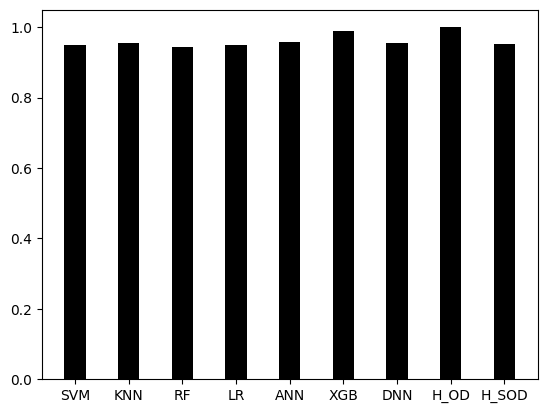

In [41]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [45]:
acc['avg'] = (acc['train']+acc['test'])/2
acc

,train,test,avg
SVM,0.950500,0.950000,0.950250
KNN,0.954875,0.944500,0.949688
RF,0.943875,0.950500,0.947188
LR,0.950000,0.950000,0.950000
ANN,0.958250,0.949000,0.953625
XGB,0.988250,0.945500,0.966875
DNN,0.954375,0.950500,0.952438
H_OD,0.999751,0.942453,0.971102
H_SOD,0.953485,0.944472,0.948979


<BarContainer object of 9 artists>

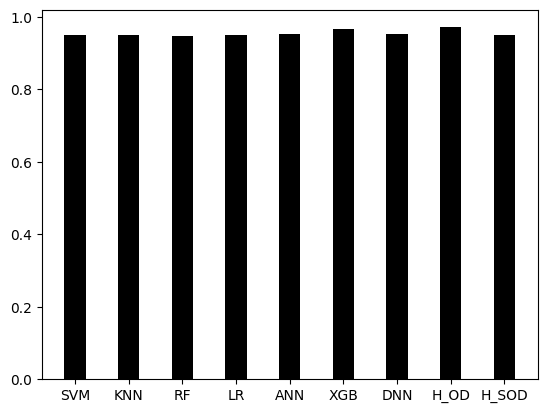

In [44]:
plt.bar(acc.index, acc['avg'], color ='black',width = 0.4)